# Um estudo sobre as Equações de Frenet e a Função Curvatura em Python
## Desenhando a curva a partir da curvatura

#### Aluna: Luiza Schneider Sampaio
#### Professora: Asla Medeiros e Sá


[Repositório do Github](https://github.com/luizasch2/A1_CurvasSuperficies)

### Importando as bibliiotecas necessárias

In [109]:
import warnings
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

### Definindo a curva

In [97]:
t = sp.symbols('t')
r = 2*(1+sp.cos(t))
x =   r*sp.cos(t)
y =  r*sp.sin(t)
z = t

### Diedro de Frenet

Seja $\alpha : I \rightarrow \mathbb{R}^2$ uma curva regular parametrizada por comprimento de arco.

A base ortonormal de $\mathbb{R}^2$ formada pelos vetores tangente $(T(s) = \alpha'(s))$ e normal $(N(s)=JT(s))$ é chamada de diedro de Frenet. Note que todo diedro de Frenet é uma base orientada positivamente, pois $$\det (T(s),N(s)) = \langle JT(s), N(s) \rangle  = \langle JT(s), JT(s) \rangle = 1$$

Com este trabalho, temos como objetivo desenhar a curva pela curvatura e, no plano, isto é possível por conta do diedro de Frenet. Vamos, então, estudar como as aplicações tangente e normal, $T, N : I \rightarrow S^1$ se relacionam com a função curvatura $\kappa: I \rightarrow \mathbb{R}$ pelas equações de Frenet, que são
\begin{align*}
T'(s) &= \kappa(s)N(s) \\
N'(s) &= -\kappa(s)T(s)
\end{align*}

Uma vez que $T'(s)$ é ortogonal a $T(s)$, temos que $T'(s)$ é paralelo a $N(s)$, e, então, $N'(s)$ é paralelo a $T(s)$. Assim, podemos escrever 
\begin{align*}
T'(s) &= \langle T'(s), N(s) \rangle N(s) \\
N'(s) &= \langle N'(s), T(s) \rangle T(s)
\end{align*}

Como $\langle T'(s), N(s) \rangle = \kappa(s)$ e $\langle N'(s), T(s) \rangle = -\kappa(s)$, temos que $\kappa(s) = \langle T'(s), N(s) \rangle = \langle \alpha''(s), N(s) \rangle$.

Vamos, então definir os vetor tangente e normal e, a partir deles, desenhar a curva (note que as funções recebem três argumentos, pois, mais a frente, iremos fazer o mesmo em $\mathbb{R}^3$, com o triedro de Frenet)

In [98]:
def T(x,y,z):
    if z == 0:
        norm = sp.sqrt(sp.diff(x,t)**2 + sp.diff(y,t)**2) 
        return sp.simplify(sp.diff(x,t)/norm), sp.simplify(sp.diff(y,t)/norm)
    else:
        dx_dt = sp.diff(x, t)
        dy_dt = sp.diff(y, t)
        dz_dt = sp.diff(z, t)
        norm = sp.sqrt(dx_dt**2 + dy_dt**2 + dz_dt**2)
        return sp.simplify(dx_dt/norm), sp.simplify(dy_dt/norm), sp.simplify(dz_dt/norm)

def N(x,y,z):
    if z ==0:
        T1, T2 = T(x, y, 0)
        dT1_dt = sp.diff(T1, t)
        dT2_dt = sp.diff(T2, t)
        norm = sp.sqrt(dT1_dt**2 + dT2_dt**2)
        return sp.simplify(dT1_dt/norm), sp.simplify(dT2_dt/norm)
    else:
        T1, T2, T3 = T(x, y, z)
        dT1_dt = sp.diff(T1, t)
        dT2_dt = sp.diff(T2, t)
        dT3_dt = sp.diff(T3, t)
        norm = sp.sqrt(dT1_dt**2 + dT2_dt**2 + dT3_dt**2)
        return sp.simplify(dT1_dt/norm), sp.simplify(dT2_dt/norm), sp.simplify(dT3_dt/norm)

Vamos, agora, utilizar os vetores para desenhar a curva usando o diedro de Frenet.

MovieWriter imagemagick unavailable; using Pillow instead.


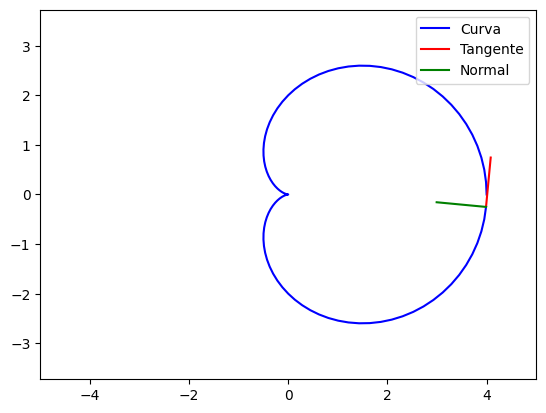

In [110]:
warnings.filterwarnings('ignore')
T_val = sp.lambdify(t, T(x,y,0)) 
N_val = sp.lambdify(t, N(x,y,0)) 

fig, ax = plt.subplots()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.axis('equal')

line, = ax.plot([], [], 'b-')  
tangent_line, = ax.plot([], [], 'r-')  
normal_line, = ax.plot([], [], 'g-') 

ax.legend(['Curva', 'Tangente', 'Normal'], loc='upper right')


def animate(i):
    t_val = 2 * np.pi * i / 100
    x_val, y_val = float(x.subs(t, t_val).evalf()), float(y.subs(t, t_val).evalf())

    line.set_data([float(x.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)],
                  [float(y.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])

    tangent_vector = T_val(t_val)
    tangent_line.set_data([x_val, x_val + tangent_vector[0]],
                          [y_val, y_val + tangent_vector[1]])
    
    normal_vector = N_val(t_val)
    normal_line.set_data([x_val, x_val + normal_vector[0]],
                         [y_val, y_val + normal_vector[1]])

    return line, tangent_line, normal_line

ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=True)

ani.save('diedroFrenet.gif', writer='imagemagick', fps=60)

### Triedro de Frenet

Para curvas parametrizadas por comprimento de arco, os vetores tangente, normal e binormal formam um sistema ortonormal chamado triedro de Frenet.

T (vetor tangente): indica a direção da curva.
\
N (vetor normal): é perpendicular à tangente e aponta para o centro de curvatura da curva.
\
B (vetor binormal): é perpendicular tanto à tangente quanto à normal.

As equações de Frenet para curvas em $\mathbb{R}^3$ são
\begin{align*}
T'(s) &= \kappa(s)N(s) \\
N'(s) &= -\kappa(s)T(s) + \tau(s)B(s) \\
B'(s) &= -\tau(s)N(s)
\end{align*}

onde $\kappa$ é a curvatura e $\tau$ é a torção.


### Vetor Binormal

O vetor binormal é definido como o produto vetorial entre o vetor tangente e o vetor normal, ou seja, $B(s) = T(s) \times N(s)$, como anteriormente estávamos no plano, não precisamos nos preocupar com o binormal, mas, agora, precisamos dele para fazer o triedro

In [100]:
def B(x, y, z):
    T1, T2, T3 = T(x, y, z)
    N1, N2, N3 = N(x, y, z)
    B1 = sp.simplify(T2*N3 - T3*N2)
    B2 = sp.simplify(T3*N1 - T1*N3)
    B3 = sp.simplify(T1*N2 - T2*N1)
    return B1, B2, B3

MovieWriter imagemagick unavailable; using Pillow instead.


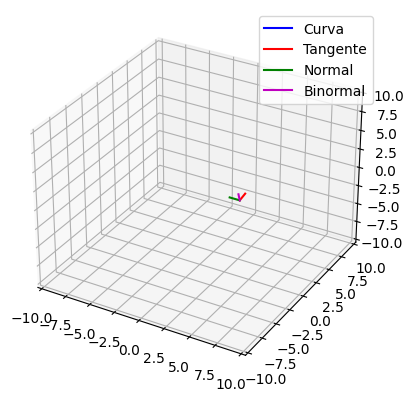

In [101]:
T_val = sp.lambdify(t, T(x,y,z))
N_val = sp.lambdify(t, N(x,y,z))
B_val = sp.lambdify(t, B(x,y,z))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

line, = ax.plot([], [], [], 'b-')
tangent_line, = ax.plot([], [], [], 'r-')
normal_line, = ax.plot([], [], [], 'g-')
binormal_line, = ax.plot([], [], [], 'm-')

ax.legend(['Curva', 'Tangente', 'Normal', 'Binormal'], loc='upper right')

def animate(i):
    t_val = 4 * np.pi * i / 100
    x_val, y_val, z_val = float(x.subs(t, t_val).evalf()), float(y.subs(t, t_val).evalf()), float(z.subs(t, t_val).evalf())

    line.set_data([float(x.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)],
                  [float(y.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])
    line.set_3d_properties([float(z.subs(t, tau).evalf()) for tau in np.linspace(0, t_val, 100)])

    tangent_vector = T_val(t_val)
    tangent_line.set_data([x_val, x_val + tangent_vector[0]],
                          [y_val, y_val + tangent_vector[1]])
    tangent_line.set_3d_properties([z_val, z_val + tangent_vector[2]])
    
    normal_vector = N_val(t_val)
    normal_line.set_data([x_val, x_val + normal_vector[0]],
                         [y_val, y_val + normal_vector[1]])
    normal_line.set_3d_properties([z_val, z_val + normal_vector[2]])
    
    binormal_vector = B_val(t_val)
    binormal_line.set_data([x_val, x_val + binormal_vector[0]],
                           [y_val, y_val + binormal_vector[1]])
    binormal_line.set_3d_properties([z_val, z_val + binormal_vector[2]])

    return line, tangent_line, normal_line, binormal_line

ani = FuncAnimation(fig, animate, frames=100, interval=100, blit=False)

# Salvar como GIF
ani.save('triedroFrenet.gif', writer='imagemagick', fps=60)

### Reconstruindo a curva pelas Equações de Frenet

As equações de Frenet (definidas anteriormentes) relacionam a curvatura com a taxa de mudança do vetor tangente (T) e o vetor normal (N) ao longo da curva

\begin{align*}
T'(s) &= \kappa(s)N(s) \\
N'(s) &= -\kappa(s)T(s)
\end{align*}

Dessa forma, é possível reconstruir a curva apenas com as equações de Frenet.

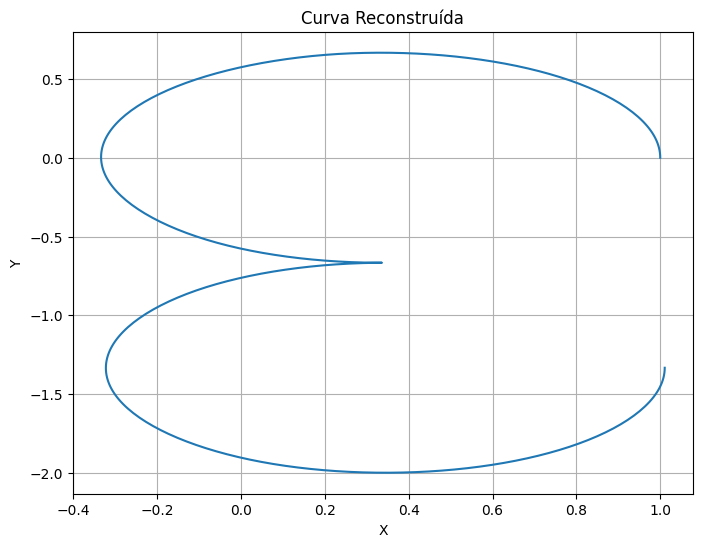

In [102]:
epsilon = 1e-10

def T2(x, y, z=0): # Redefinindo adicionando um epsilon para evitar divisão por zero
    if z == 0:
        norm = sp.sqrt(sp.diff(x, t)**2 + sp.diff(y, t)**2) + epsilon
        return sp.simplify(sp.diff(x, t) / norm), sp.simplify(sp.diff(y, t) / norm)
    else:
        pass

T_x_func = sp.lambdify(t, T2(x, y,0)[0], modules=["numpy"])
T_y_func = sp.lambdify(t, T2(x, y,0)[1], modules=["numpy"])

def equations(t, y):
    x_pos, y_pos = y
    T_x = T_x_func(t)
    T_y = T_y_func(t)
    return [T_x, T_y]

initial_conditions = [1, 0] 

time = np.linspace(0, 2*np.pi, 400)
solution = solve_ivp(equations, [0, 2*np.pi], initial_conditions, t_eval=time) # Resolvendo as EDO's

plt.figure(figsize=(8, 6))
plt.plot(solution.y[0], solution.y[1])
plt.title('Curva Reconstruída')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.savefig('curva_reconstruida.png')


## Desenhando a curva a partir da curvatura

Vamos trabalhar aqui apenas com curvas regulares, mais a frente explico o porquê.

### Calculando a função curvatura

Vamos, primeiramente, definir a função $\kappa(s)$ 

A função curvature recebe $x$ e $y$ e calcula a curvatura de uma curva $\alpha(t) = (x(t),y(t))$

Esta função será útil para o segundo passo, que é resolver as equações de Frenet.

Relembremos a equação da curvatura:

Se a curva for unit-speed $$| \kappa (t)| = ||\alpha''(t)|| $$

Se não, $$\kappa(t) = \frac{\det [\alpha'(t), \alpha''(t)]}{||\alpha'(t)||^3}$$

In [103]:
def curvature(x, y):
    norm = sp.simplify(sp.sqrt(x**2 + y**2))
    dx_dt = sp.diff(x,t)
    dy_dt = sp.diff(y,t)
    dxx_d2t = sp.diff(dx_dt,t)
    dyy_d2t = sp.diff(dy_dt, t)

    if norm == 1:
        return sp.simplify(sp.sqrt(dxx_d2t**2 + dyy_d2t**2))
    
    else:
        return sp.simplify((dx_dt*dyy_d2t - dy_dt*dxx_d2t)/((sp.sqrt(dx_dt**2 + dy_dt**2))**3))


### Resolvendo as equações de Frenet

Vamos resolver as seguintes equações

\begin{align*}
\kappa(s) &= \frac{T'(s)}{N} \\
-\kappa(s) &= \frac{N'(s)}{T(s)}
\end{align*}


Agora, vamos supor que só temos a curvatura e queremos desenhar a curva. Para isso, vamos resolver as equações de Frenet e, a partir delas, desenhar a curva, portanto, vamos assumir $T$ e $N$ desconhecidos

In [104]:
Tf = sp.Function('T')(t)
Nf = sp.Function('N')(t)
kappa = curvature(x, y)
kappa_evals = sp.lambdify(t, kappa, modules=["numpy"])


edo1 = sp.Eq(kappa, sp.diff(Tf, t) / Nf)
edo2 = sp.Eq(-kappa, sp.diff(Nf, t) / Tf)

edo1

Eq(3*sqrt(2)/(8*sqrt(cos(t) + 1)), Derivative(T(t), t)/N(t))

In [105]:
edo2

Eq(-3*sqrt(2)/(8*sqrt(cos(t) + 1)), Derivative(N(t), t)/T(t))

precisamos, então resolver a EDO acima, mas, o método solve do sympy não é otimizado para este tipo de EDO, então, vamos usar alguns métodos da análise numérica

### Resolvendo a EDO numericamente


#### Método de Euler

Este método é um método de primeira ordem, que consiste em aproximar a solução de uma EDO por uma reta tangente à solução exata. A equação de Euler é dada por 
\begin{align*} 
y_{n+1} = y_n + h f(x_n,y_n) 
\end{align*}

onde $h$ é o passo, $y_n$ é a solução aproximada no ponto $x_n$ e $f(x_n,y_n)$ é a derivada da função $y$ no ponto $x_n$.

Este é o método explícito mais simples para resolver EDOs, veremos outro método mais a frente.

O método de Euler é um método de primeira ordem, o que significa que o erro local (erro por passo) é proporcional ao quadrado do tamanho do passo, e o erro global (erro em um determinado momento) é proporcional ao tamanho do passo.

Da equação acima, note que se a derivada for zero, a solução é constante, o que não é o que queremos, e, por isso, só estamos interessados em curvas regulares.


In [106]:
def eulerStep1(T0, N0, dt, kappa):
    Tf = (T0 + dt*(N0*kappa))
    Nf = (N0 - dt*(T0*kappa))
    return Tf, Nf

def eulerStep2(T0, x0, dt):
    return x0 + dt*T0

#### Método de Runge-Kutta

O método de Runge-Kutta é uma família de métodos iterativos (implícitos e explícitos) usado na discrteização temporal para aproximar soluções de equações não linear.

Considere o problema de valor inicial:
\begin{align*}
\frac{dy}{dt} = f(t,y) \\
y(t_0) = y_0
\end{align*}

Aqui, $y$ é uma função desconhecida de tempo $t$, que gostaríamos de aproximar. Vamos escoher um $h>0$ e definimos:
\begin{align*}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4), \\
t_{n+1} = t_n + h
\end{align*}

onde

\begin{align*}
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1) \\
k_3 &= f(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2) \\
k_4 &= f(t_n + h, y_n + hk_3)
\end{align*}

Aqui, $k_1$ é a inclinação no início do intervalo, usando $y_n$; $k_2$ é a inclinação no ponto médio do intervalo, usando $y_n$ e $k_1$; $k_3$ é a inclinação no ponto médio do intervalo, usando $y_n$ e $k_2$; $k_4$ é a inclinação no final do intervalo, usando $y_n$ e $k_3$.

Ao calcular a média dessas quatro inclinações, é dado maior peso à inclinação no ponto médio do intervalo, o que torna o método de Runge-Kutta de quarta ordem mais preciso que o método de Euler.

E, pelo mesmo motivo do método de Euler, só estamos interessados em curvas regulares.

In [107]:
def rK4Step(T0, N0, dt, k):
    A = np.array([[0,0,k,0],
                  [0,0,0,k],
                  [-k,0,0,0],
                  [0,-k,0,0]])
    vec = np.array([T0[0], T0[1], N0[0], N0[1]])

    k1 = np.dot(A, vec)
    k2 = np.dot(A, vec + dt*k1/2)
    k3 = np.dot(A, vec + dt*k2/2)
    k4 = np.dot(A, vec + dt*k3)

    vec = vec + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    Tf = np.array([vec[0], vec[1]])
    Nf = np.array([vec[2], vec[3]])
    return Tf, Nf

#### Plotando os dois métodos

Vamos, então, plotar as curvas obtidas pelos dois métodos, para ver a diferença entre eles.

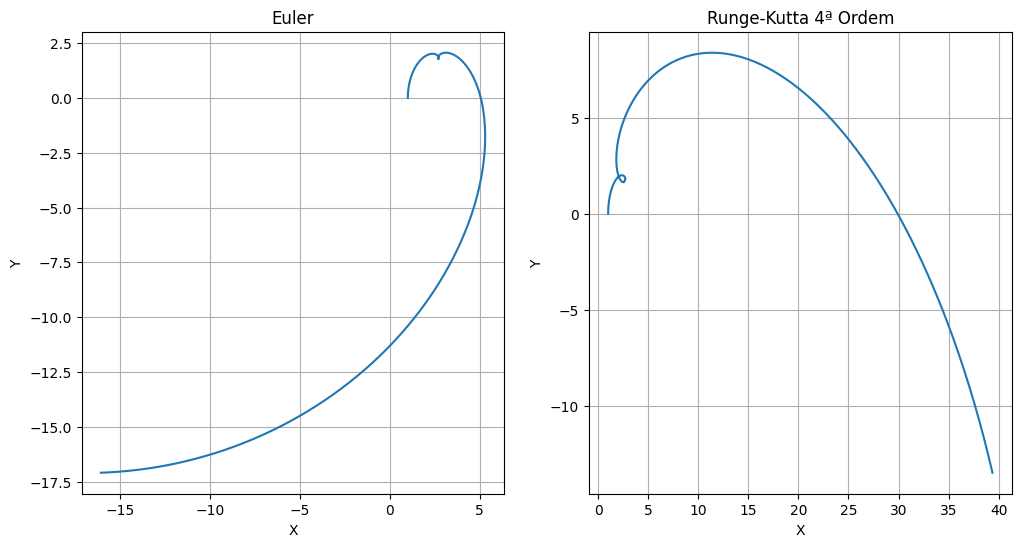

In [108]:
p0 = np.array([1, 0])

N0 = np.array([1, 0])
T0 = np.array([0, 1])

# Passo de tempo

t0 = 0
tf = 2*np.pi

dt = 0.01

# Vetor de tempo

time = np.arange(t0, tf, dt)

# Vetor de posições

positions_euler = np.zeros((len(time), 2))

positions_euler[0] = p0

positions_rk = np.zeros((len(time), 2))

positions_rk[0] = p0

for i in range(1, len(time)):

    Tf, Nf = eulerStep1(T0, N0, dt, kappa_evals(time[i-1]))
    positions_euler[i] = eulerStep2(T0, positions_euler[i-1], dt)
    T0 = Tf
    N0 = Nf

p0 = np.array([1, 0])

N0 = np.array([1, 0])
T0 = np.array([0, 1])

for i in range(1, len(time)):

    Tf, Nf = rK4Step(T0, N0, dt, kappa_evals(time[i-1]))
    positions_rk[i] = eulerStep2(T0, positions_rk[i-1], dt)
    T0 = Tf
    N0 = Nf

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(positions_euler[:, 0], positions_euler[:, 1])
plt.title('Euler')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(positions_rk[:, 0], positions_rk[:, 1])
plt.title('Runge-Kutta 4ª Ordem')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

plt.savefig('comparacaoMetodos.png')
plt.show()


### Referências
- LIMA, Ronaldo Freire de. Introdução à Geometria Diferencial
- Notas de aula, 2024.
- https://en.wikipedia.org/wiki/Euler_method
- https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods
- [Documentação Sympy](https://docs.sympy.org/latest/index.html)